In [1]:
import pandas as pd
import numpy as np

In [33]:
df = pd.read_csv("/content/Superstore1.csv",  encoding='ISO-8859-1')

In [34]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,12-06-2016,16-06-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [36]:
df.sort_values(by='Order Date', inplace=True)

df_time_series = df[['Order Date', 'Sales', 'Profit']]

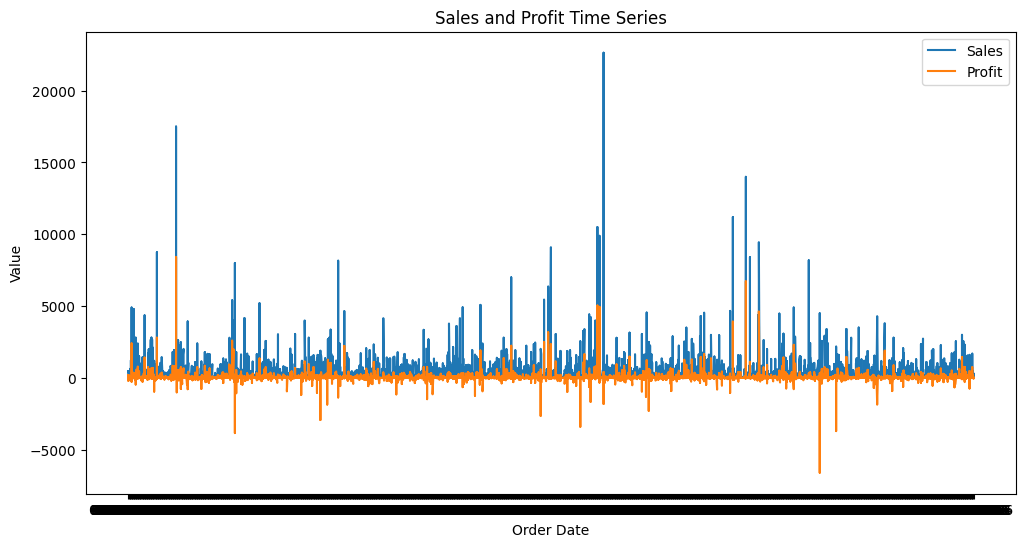

In [38]:
import matplotlib.pyplot as plt

df_time_series.set_index('Order Date', inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(df_time_series['Sales'], label='Sales')
plt.plot(df_time_series['Profit'], label='Profit')
plt.xlabel('Order Date')
plt.ylabel('Value')
plt.title('Sales and Profit Time Series')
plt.legend()
plt.show()


In [39]:
print(df_time_series.columns)


Index(['Sales', 'Profit'], dtype='object')


In [40]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.set_index('Order Date', inplace=True)

# Extract the 'Sales' column
df_sales = df['Sales']

<ipython-input-40-7e29755683f2>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


In [42]:
df = df.reset_index()
df.head()

,Order Date,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,2017-01-01,6683,CA-2017-154466,02-01-2017,First Class,DP-13390,Dennis Pardue,Home Office,United States,Franklin,...,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
1,2017-01-01,8076,CA-2017-151750,05-01-2017,Standard Class,JM-15250,Janet Martin,Consumer,United States,Huntsville,...,77340,Central,OFF-AP-10004708,Office Supplies,Appliances,Fellowes Superior 10 Outlet Split Surge Protector,15.224,2,0.8,-38.8212
2,2017-01-01,8075,CA-2017-151750,05-01-2017,Standard Class,JM-15250,Janet Martin,Consumer,United States,Huntsville,...,77340,Central,OFF-BI-10000343,Office Supplies,Binders,"Pressboard Covers with Storage Hooks, 9 1/2"" x...",13.748,14,0.8,-22.6842
3,2017-01-01,8074,CA-2017-151750,05-01-2017,Standard Class,JM-15250,Janet Martin,Consumer,United States,Huntsville,...,77340,Central,OFF-BI-10000301,Office Supplies,Binders,GBC Instant Report Kit,6.470,5,0.8,-9.7050
4,2017-01-01,8073,CA-2017-151750,05-01-2017,Standard Class,JM-15250,Janet Martin,Consumer,United States,Huntsville,...,77340,Central,OFF-AR-10003158,Office Supplies,Art,Fluorescent Highlighters by Dixon,12.736,4,0.2,2.2288


In [43]:
df['Order Date'] = pd.to_datetime(df['Order Date'])


In [44]:
missing_values = df['Sales'].isnull().sum()


In [48]:
df['Sales']

0         3.600
1        15.224
2        13.748
3         6.470
4        12.736
         ...   
9989     23.480
9990     47.616
9991    156.512
9992    302.376
9993     38.376
Name: Sales, Length: 9994, dtype: float64

In [50]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

df.set_index('Order Date', inplace=True)

monthly_sales = df['Sales'].resample('M').sum()


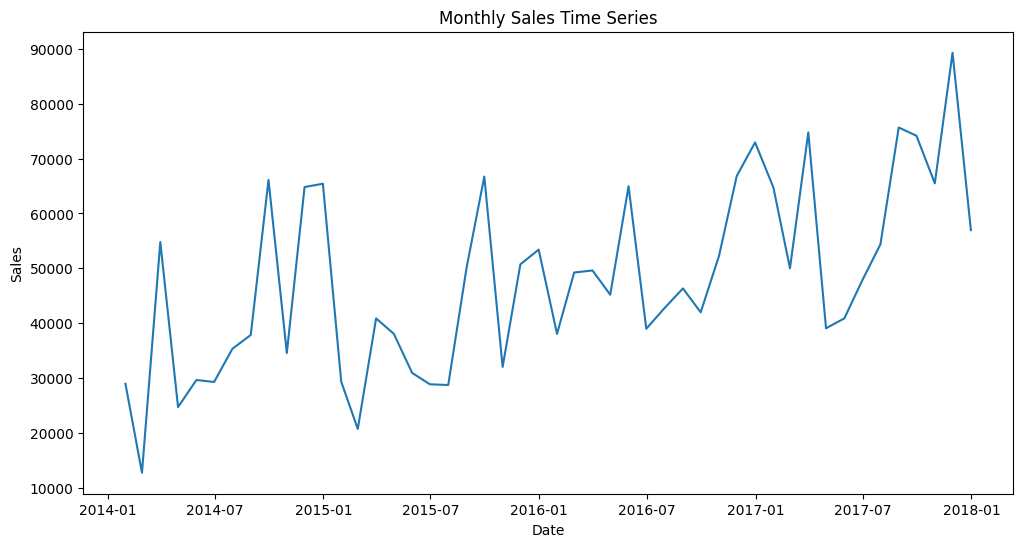

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales)
plt.title('Monthly Sales Time Series')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


In [52]:
mean_sales = df['Sales'].mean()
median_sales = df['Sales'].median()
std_sales = df['Sales'].std()


In [53]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(monthly_sales, model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


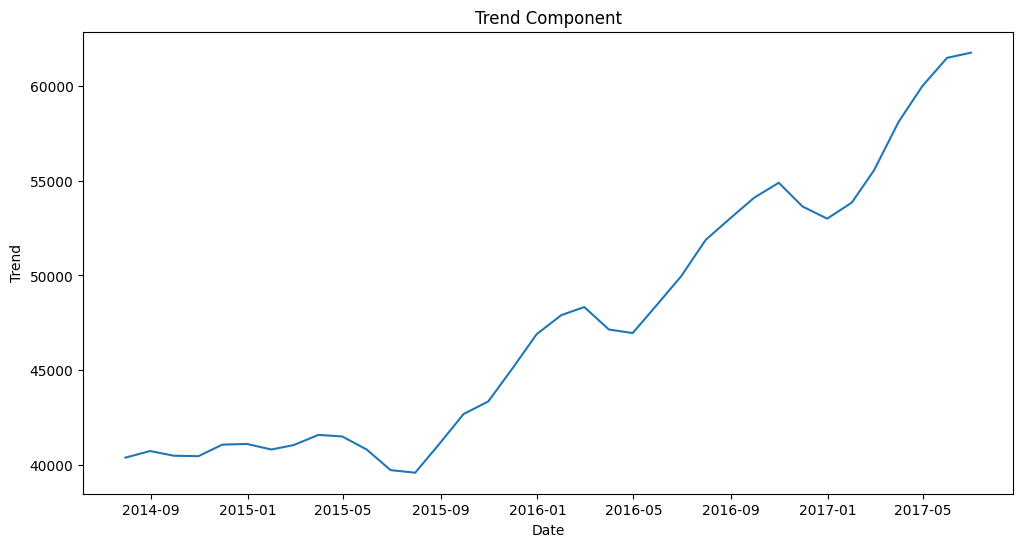

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(trend)
plt.title('Trend Component')
plt.xlabel('Date')
plt.ylabel('Trend')
plt.show()


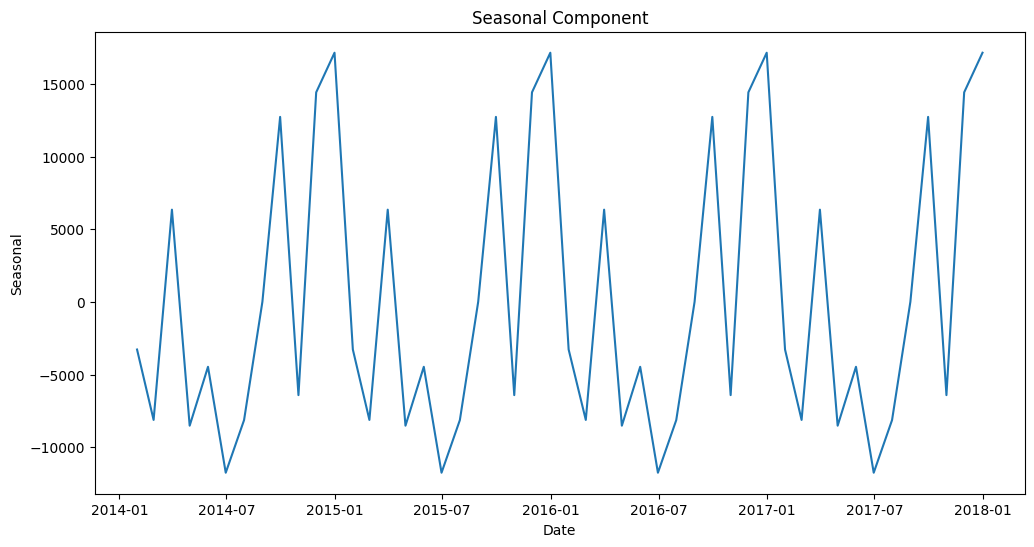

In [55]:
plt.figure(figsize=(12, 6))
plt.plot(seasonal)
plt.title('Seasonal Component')
plt.xlabel('Date')
plt.ylabel('Seasonal')
plt.show()


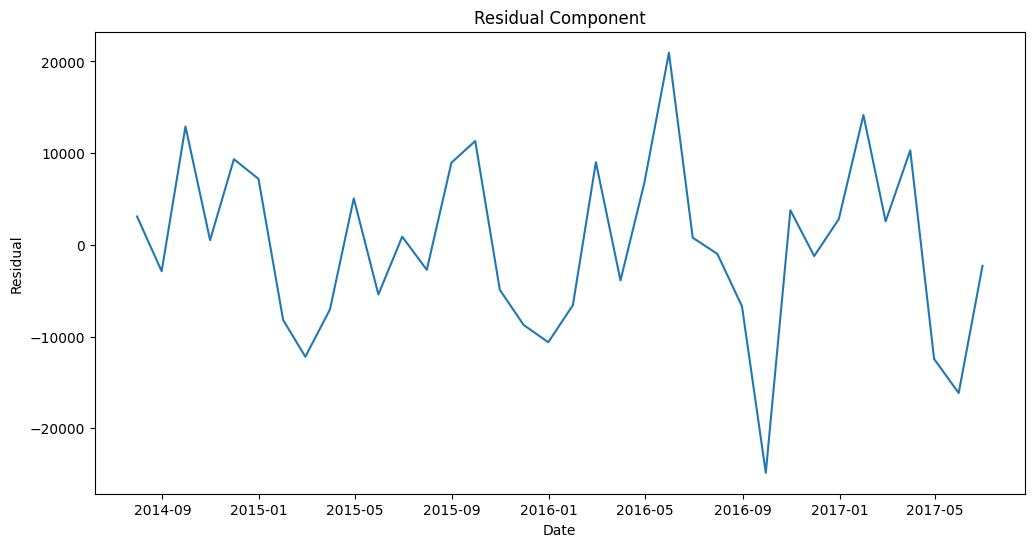

In [56]:
plt.figure(figsize=(12, 6))
plt.plot(residual)
plt.title('Residual Component')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.show()
